Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
from numpy.random import *
import scipy as sp
from scipy.optimize import curve_fit
from random import randint, random
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance

/var/folders/vx/hcp7x2k56qj24ksjy2vx2vlr0000gn/T/ipykernel_87126/3315384713.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.1.1

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999994


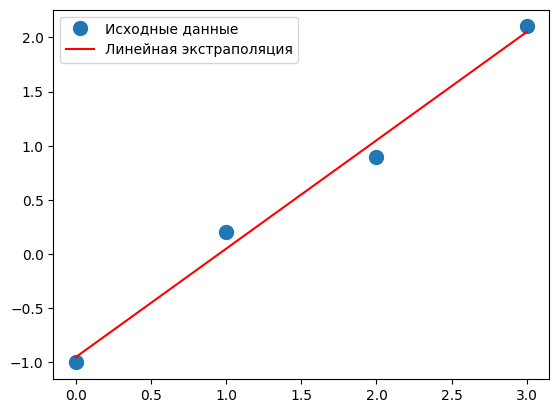

In [3]:
x=np.array([0,1,2,3])
y=np.array([-1,0.2,0.9,2.1])


A=np.vstack([x,np.ones(len(x))]).T


print(A)

m, c = np.linalg.lstsq(A,y,rcond=None)[0]

print(m,c)

import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2

[-5.40850855 -3.86160276 -3.32018887 -2.10717247 -1.10602028  0.00828386
  1.3661481   1.94740262  2.72539996  3.63826115  5.25425639]
[25.42852617 16.13021449  9.10476172  3.60306346  1.31431395 -0.32667137
  1.42676705  4.08183955  9.01165784 16.32234911 24.59705823]


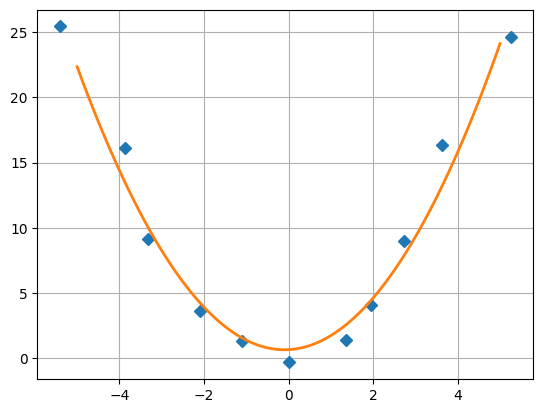

In [4]:
delta=1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

m=vstack((x**2,x,ones(11))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3

[-5.33038256 -4.23066589 -2.75113708 -2.11340268 -1.48509078  0.43708711
  1.11118082  2.03337386  3.3623806   3.87268816  4.7332028 ]
[25.35234001 15.66574249  8.99808428  4.22534271  0.61501605  0.43179237
  0.9052673   4.17692363  9.3877261  16.07997592 25.29838316]


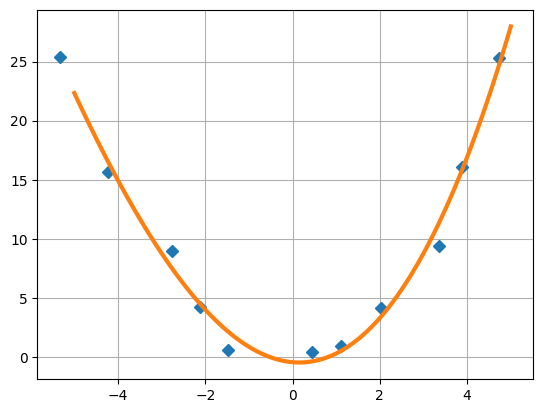

In [5]:
delta=1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

m=vstack((x**3,x**2,x,ones(11))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec +s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

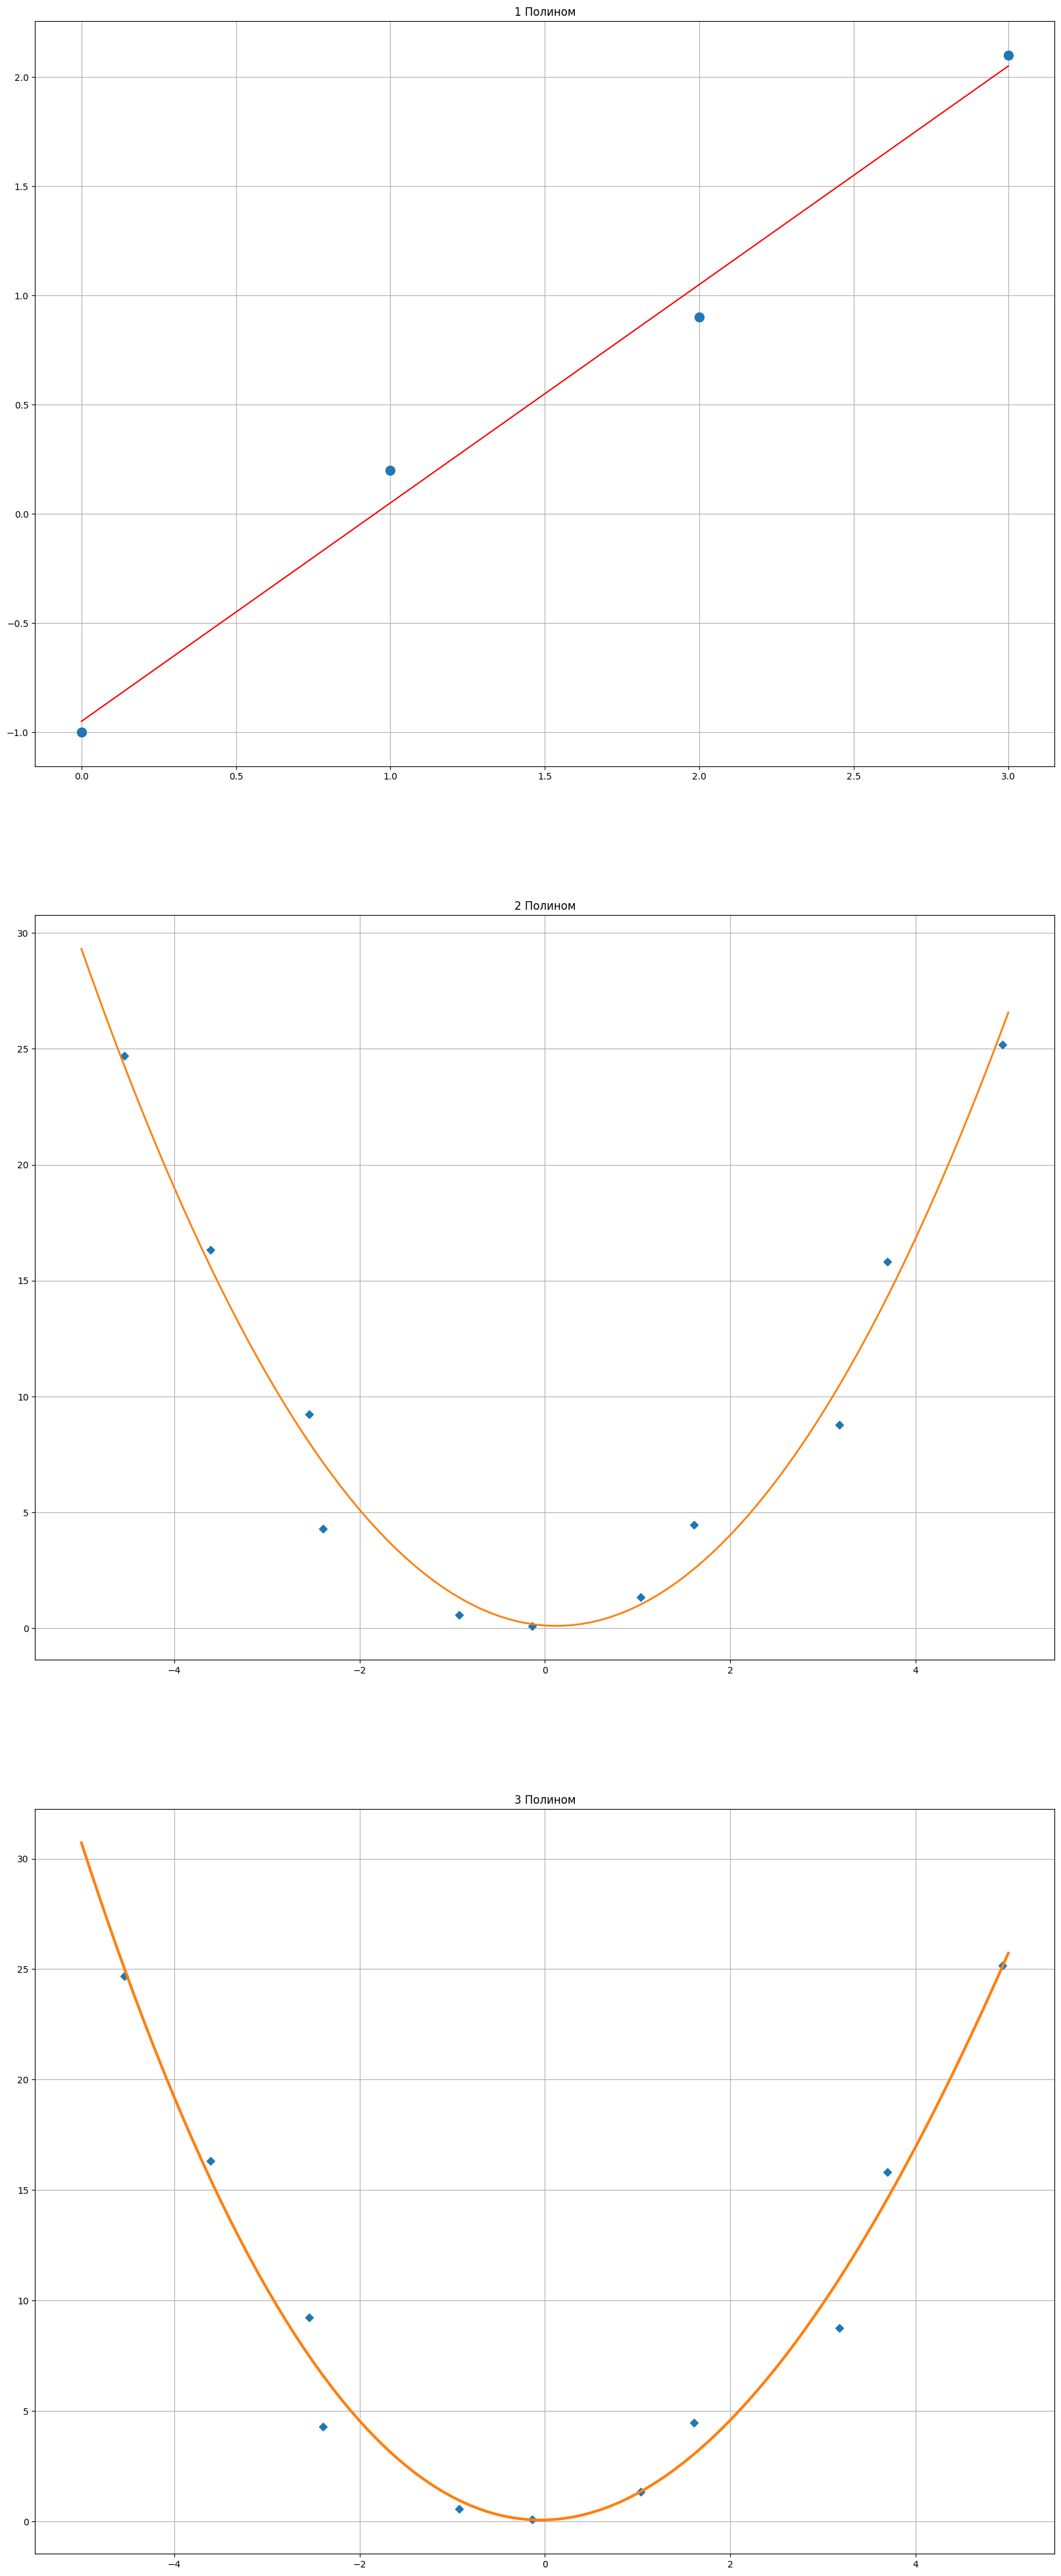

In [6]:
figure, axis = plt.subplots(3,1)
delta = 1.0
figure.set_figheight(50)
figure.set_figwidth(20)
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y,rcond = None)[0]

axis[0].plot(x, y, 'o', label='Исходные данные', markersize=10)
axis[0].plot(x, m*x + c, 'r', label='Линейная экстраполяция')
axis[0].set_title("1 Полином")
axis[0].grid()


x = np.linspace(-5, 5, 11)
y = x**2 + delta * (np.random.rand(11) - 0.5)
x+= delta * (np.random.rand(11) - 0.5)
m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = np.linspace(-5, 5, 101)

axis[1].plot(x,y,'D')
axis[1].plot(x_prec, s[0]*x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
axis[1].set_title("2 Полином")
axis[1].grid()


m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
axis[2].plot(x,y,'D')
axis[2].plot(x_prec, s[0]*x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec +s[3], '-', lw=3)
axis[2].set_title("3 Полином")
axis[2].grid()

1.1.4

0.0002535035986991889
0.1366292957891775


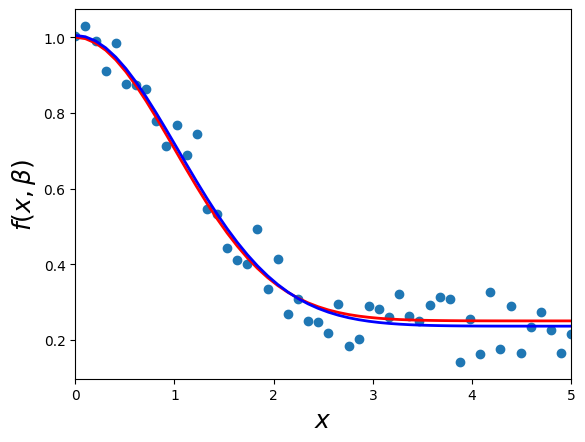

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.00221778 1.02985049 0.99113944 0.9099258  0.98452297 0.876891
 0.87242057 0.86288312 0.77733287 0.71182344 0.76793523 0.68752701
 0.7434947  0.54555145 0.53309619 0.4415736  0.41118948 0.40065863
 0.4921348  0.3331821  0.41469285 0.26910744 0.30735601 0.25017511
 0.24583989 0.21705694 0.29487034 0.18354007 0.20105494 0.28843027
 0.28061971 0.25922301 0.32215375 0.26198847 0.24921903 0.29326954
 0.31342881 0.30874302 0.14150816 0.2555

In [7]:
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
from scipy.optimize import curve_fit
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
lin_dev=sum(beta_cov[0])
print(lin_dev)

residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

1.1.5

[0.27514936 0.7492747 ]
1.3220118376203185e-05
0.011624586540156658


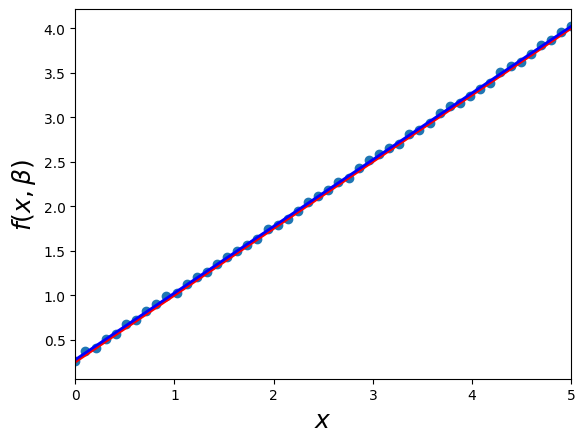

[0.24318807 0.74784396 0.50028578]
0.00017465685209881152
0.14564552871655093


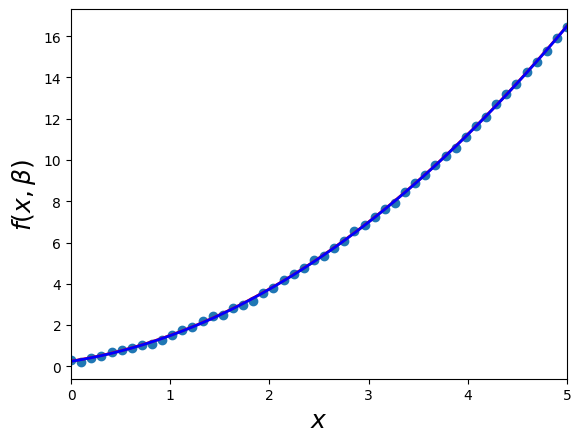

[1.01570742 1.98388511]
5.625647028733411e-05
0.13008978806886085


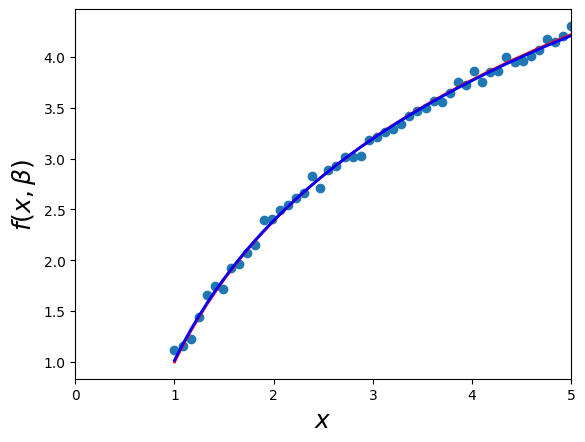

[0.99518195 2.00326035]
5.441153469616658e-06
0.13169415630131925


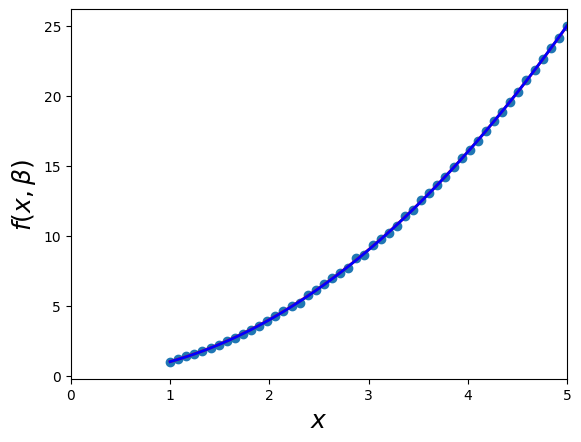

In [8]:
##1
beta = (0.25,0.75)

def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##2
beta = (0.25,0.75,0.5)
def f(x, b0, b1,b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\

##3
beta = (1,2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##3
beta = (1,2)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])

print(lin_dev) 

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

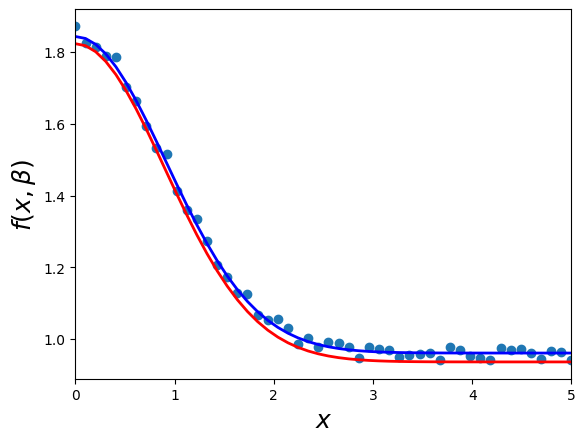

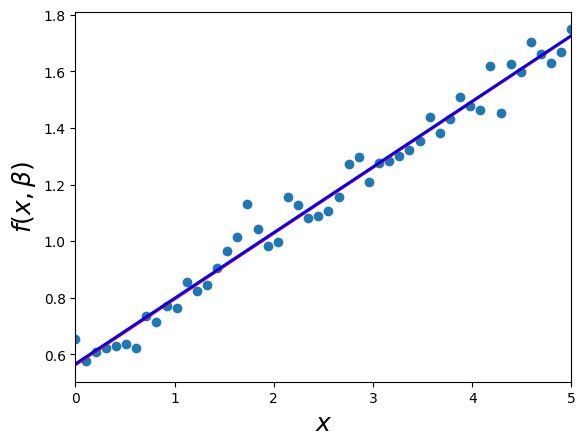

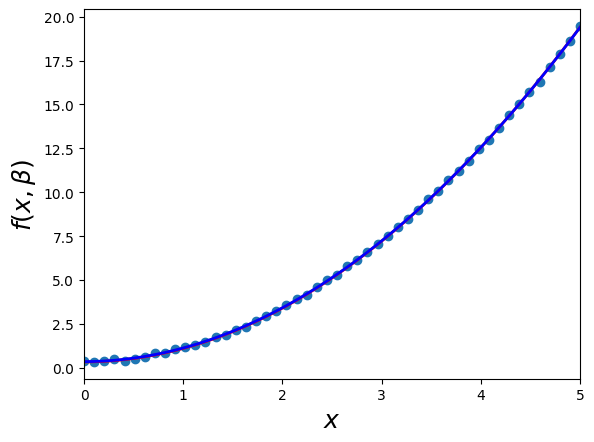

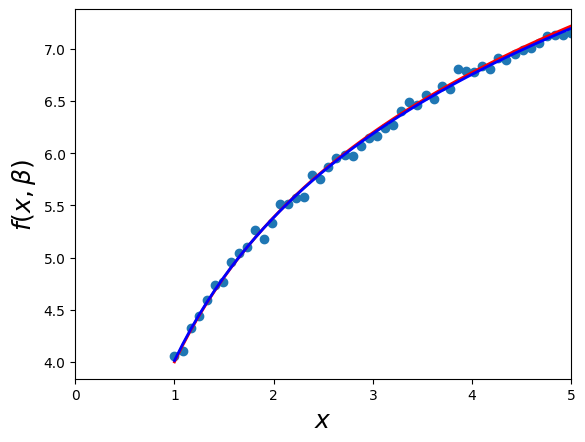

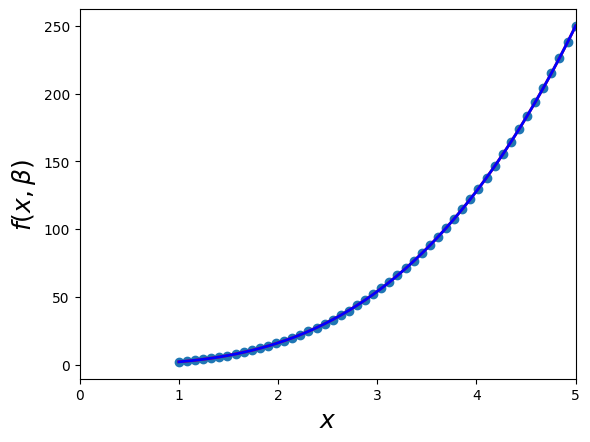

In [9]:
##0
beta = (random(), random(), random())

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##1
beta = (random(), random())
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
line_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\

##2
beta = (random(), random(), random())
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##3
beta = (randint(1, 4), randint(1, 4))
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##4
beta = (randint(1, 3), randint(1, 3))
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()